In [1]:
%matplotlib inline
%precision 16
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# Homework 0:  Introduction

## Question 1

Compute the solution to the following sets of equations.  **FULLY** justify your solution (do not just write the answer).

If you want to review some of these concepts check out Strang's [Linear Algebra](https://clio.columbia.edu/catalog/10612929) text or for only the fundamentals check out Strang's [The Fundamental Theorem of Linear Algebra](http://www.jstor.org/stable/2324660?seq=1#page_scan_tab_contents)

**(a)** (5) Solve $A x = b$ where
$$
    A = \begin{bmatrix}
        2 & 1 \\
        1 & 3
    \end{bmatrix} ~~~~ 
    b = \begin{bmatrix}
        1 \\
        -2
    \end{bmatrix}
$$

## Solution
To find our solution we augment the matrix and then push it into reduced row echelon form

1. Create the augmented matrix
$
    \begin{bmatrix}
        2 & 1 & 1 \\
        1 & 3 & -2
    \end{bmatrix}
$

2. Swap the two rows
$
    \begin{bmatrix}
        1 & 3 & -2 \\
        2 & 1 & 1
    \end{bmatrix}
$
3. Multiply the first row by -2 and add it to the second
$
    \begin{bmatrix}
        1 & 3 & -2 \\
        0 & -5 & 5
    \end{bmatrix} 
$
4. Multiply the second row by $\frac{3}{5}$ and add it to the first
$
    \begin{bmatrix}
        1 & 0 & 1 \\
        0 & -5 & 5
    \end{bmatrix} 
$
5. Multiply the second row by $-\frac{1}{5}$
$
    \begin{bmatrix}
        1 & 0 & 1 \\
        0 & 1 & -1
    \end{bmatrix}
$

From this form we can read off the solution as $x=\begin{bmatrix}1\\-1\end{bmatrix}$ 




**(b)** (5) Solve the system of equations:
\begin{align}
    2x + 3y &= 1 \\
    6x + 9y &= 3
\end{align}

## Solution
Here it is clear that the two equations are linearly dependant, which means we will have an infinite number of solutions. Again we push to reduced row echelon form

1. Create augmented matrix
$
    \begin{bmatrix}
        2 & 3 & 1 \\
        6 & 9 & 3
    \end{bmatrix}
$

2. Multiply the first row by $-3$ and add it to the second
$
    \begin{bmatrix}
        2 & 3 & 1 \\
        0 & 0 & 0
    \end{bmatrix}
$

3. Divide the first row by 2
$
    \begin{bmatrix}
        1 & \frac{3}{2} & \frac{1}{2} \\
        0 & 0 & 0
    \end{bmatrix}
$

From this form we can read off the implicit relationship 
$$
x + \frac{3}{2}y = \frac{1}{2}
$$

Then we can do a little algebra to write y in terms of x 
$$
y = \frac{1}{3} - \frac{2}{3}x
$$

Which means we solutions can parameterize this solution introducing a new variable t and obtain our set of solutions:
$$
    \begin{bmatrix}
        x \\
        y 
    \end{bmatrix} = 
    \begin{bmatrix}
        0 \\
        \frac{1}{3}
    \end{bmatrix} +
    t\begin{bmatrix}
        1 \\
        \frac{2}{3}
    \end{bmatrix}
$$
where $t \in \mathbb{R}$



**(c)** (5) Why will I not be able to solve $Ax=b$ for
$$
    A = \begin{bmatrix}
        2 & 1 \\
        1 & 3 \\
        0 & 4
    \end{bmatrix} ~~~~ 
    b = \begin{bmatrix}
        2 \\
        0 \\
        1
    \end{bmatrix}?
$$
Describe why this is a problem in terms of the column, row, left-null, and null spaces of $A$ and how that relates to the vector $b$.

### Solution
Finding the solution of an equation in the form $Ax = b$ is equivelent to finding all linear combinations of the columns that produce the b vector. The column space is two linearly independant vectors in r3, which means that they span a plane. if the b vector is not on that plane, which is the case here, then there will be no solutions. If the column space spanned $\mathbb{R}^3$, i.e. was made up of  3 linearly independant vectors in $\mathbb{R}^3$, then we would be guaranteed a solution.



## Question 2

**(a)** (10) Write a function that computes
$$
    \sum^\infty_{n=1} \frac{a^n}{b^{n-1}}
$$
until the difference between subsequent partial sums is less than the given tolerance $T$.  Return the computed sum.  Make sure to include a way for the function to exit if the partial sums do not satisfy the above criteria (the sum may not be convergent for instance).

In [2]:
def compute_sum(a, b, t):
    """
    Computes an infinite sum of the form a^n / b^(n-1) where n goes from 1, inf. 
    Returns the sum once the difference is less than passed tolerance t
    
    Returns
    -------
    The value of the sum
    
    Raises
    ------
    ValueError: Error if the parameters passed are of incorrect type or value. Notably when they cause
        the sume to diverge.
    """
    tot = 0.0
    n = 1
    while True:
        # Wrap in try block to raise value error when overflow occuse
        # This could be more closed form, but we have fast computers
        try:
            # Calculate the next term in the series
            next_term = (a ** n) / (b ** (n - 1))
            
            # If the abs of the next term is less than tolerence break 
            if abs(next_term) < t:
                break
            
            # Else append to the tot and increment n
            tot += next_term
            n += 1
        except OverflowError:
            raise ValueError
    return tot

In [3]:
numpy.testing.assert_allclose(compute_sum(-2.0, 3.0, 1e-16), -1.2)
numpy.testing.assert_allclose(compute_sum(1.0, 2.0, 1e-16), 2.0)
try:
    compute_sum(2.0, 1.0, 1e-16)
except ValueError:
    pass
else:
    assert False

**(b)** (5) Explore different tolerances for your function above for $a=-2$ and $b=3$.  Plot the difference
$$
    \left| ~ \sum^\infty_{n=1} \frac{a^n}{b^{n-1}} - (-1.2) ~\right |
$$
versus the value of the tolerance.  The plotting command `loglog` may be useful to effectively visualize the problem.  What do you observe?

Hint:  Try using tolerances in the range $T \in [10^{-30}, 10^{-2}]$.

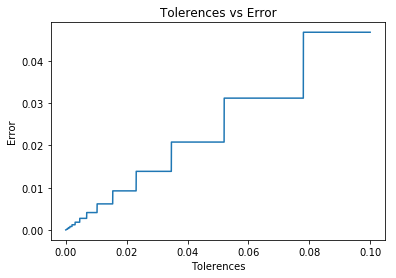

In [4]:
# Create linspace in the recomended range
tols = numpy.linspace(10e-30, 10e-2, 5000)

# Compute sum for each of the tolerences
vals = []
for tol in tols:
    vals.append(abs(compute_sum(-2, 3, tol) - (-1.2)))
    
# Plot and label the values
plt.figure()
plt.plot(tols, vals)
plt.xlabel("Tolerences")
plt.ylabel("Error")
plt.title("Tolerences vs Error")

As the tolerence approaches 0, the error also approaches 0. As the tolerence increases, the error will stay the same until a threshold. Once the threshold is reached, the error jumps up to the next discrete value. As the tolerence increases, the steps in this step function also increase in length. Each step in this function represents another term getting left out of sum. It makes sense that these steps get larger as the tolerence does because the terms in a convergent sum will get larger and larger as $n\rightarrow0$. 

## Question 3

**(a)** (7) Compute the first 3 terms of the Taylor series of the function
$$
    f(x) = e^{-x^2} \sin( x - \pi)
$$
centered at $x_0 = \pi$.

## Solution
The formula for a taylor series for a function f(x) about $x=a$ is $f(x)=\sum_{n=0}^\infty \frac{f^{(n)}(a)}{n!}(x-a)^n$

We start out by calculating the 1st and 2nd derivatives of our function

$$
\begin{align}
    f(x) &= e^{-x^2} \sin( x - \pi) \\
    f'(x) &= e^{-x^2}(2xsin(x) - cos(x)) \\
    f''(x) &= e^{-x^2}(3sin(x) + 2xcos(x)) - 2xe^{-x^2}(2xsin(x) - cos(x)))
\end{align}
$$

Now we plug these derivatives into the above form to obtain our 3 terms

$$
\begin{align}
t_0 &= e^{-\pi^2}\sin(\pi - \pi)(x - \pi)^0 = 0 \\
t_1 &= e^{-\pi^2}(2\pi sin(\pi) - cos(\pi))(x-\pi)^1 = e^{-\pi^2}(x-\pi) \\
t_2 &= \frac{e^{-\pi^2}(3sin(\pi) + 2\pi cos(\pi)) - 2\pi e^{-\pi^2}(2\pi sin(\pi) - cos(\pi)))}{2}(x-\pi)^2 = -2\pi e^{-\pi^2}(x-\pi)^2
\end{align}
$$

So our 2nd degree approximation of $f(x)$ about $x_0 = \pi$ would be 

$$
0+ e^{-\pi^2}(x-\pi) - 2\pi e^{-\pi^2}(x-\pi)^2
$$

**(b)** (8) Solve the ODE
$$
    u'' + u' + \frac{5}{4} u = 0
$$
with initial conditions $u(0) = 3$ and $u'(0) = 1$.  Plot the solution and comment on its behavior as $t \rightarrow \infty$.

## Solution
Begin by factoring the charactersitic polynomial

$$
\begin{align}
r^2 + r + \frac{5}{4} &= 0 \\
(r - (-\frac{1}{2} + i))(r - (-\frac{1}{2} - i)) &= 0
\end{align}
$$

Since we have two distinct imaginary roots we know our general solution must be

$$
\begin{align}
u(t) &= e^{-\frac{1}{2}t}(c_1cos(t) + c_2sin(t)) 
\end{align}
$$

Next we differentiate the general solution

$$
\begin{align}
u(t) &= e^{-\frac{1}{2}t}(c_1cos(t) + c_2sin(t)) \\
u'(t) &= e^{-\frac{1}{2}t}(c_2cos(t) - c_1sin(t)) - \frac{1}{2}e^{-\frac{1}{2}t}(c_1cos(t) + c_2sin(t)) 
\end{align}
$$

Then we plug in our initial conditions
$$
\begin{align}
3 &= c_1 \\
1 &= c_2 - \frac{1}{2}c_1 
\end{align}
$$

We which trivially gives $c_1 = 3$, $c_2 = \frac{5}{2}$

Finally we plug these constants back into the original equation to find our solution

$$
\begin{align}
u(t) &= e^{-\frac{1}{2}t}(3cos(t) + \frac{5}{2}sin(t)) = \frac{1}{2}e^{-\frac{1}{2}t}(6cos(x) + 5sin(x))
\end{align}
$$

From this equation it is clear to see that as $t \rightarrow \infty$, $u(t) \rightarrow 0$ because the term $e^{-\frac{1}{2}t}$ drives the function to 0. While it is being driven to 0, the function will oscillate due to the $6cos(x) + 5sin(x)$ term.

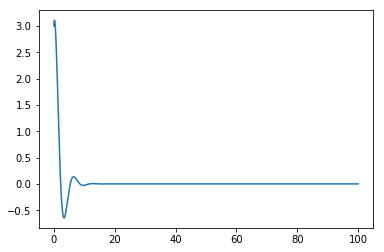

In [5]:
x = numpy.linspace(0, 100, 1000)
y = 0.5 * numpy.exp(-0.5* x) * (6 * numpy.cos(x) + 5 * numpy.sin(x))
plt.plot(x, y)

## Question 4

(5) Plot something fun making sure to label the axes and colorbar if appropriate.  Use the [matplotlib gallery](http://matplotlib.org/gallery.html) for inspiration.

/home/calvin/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


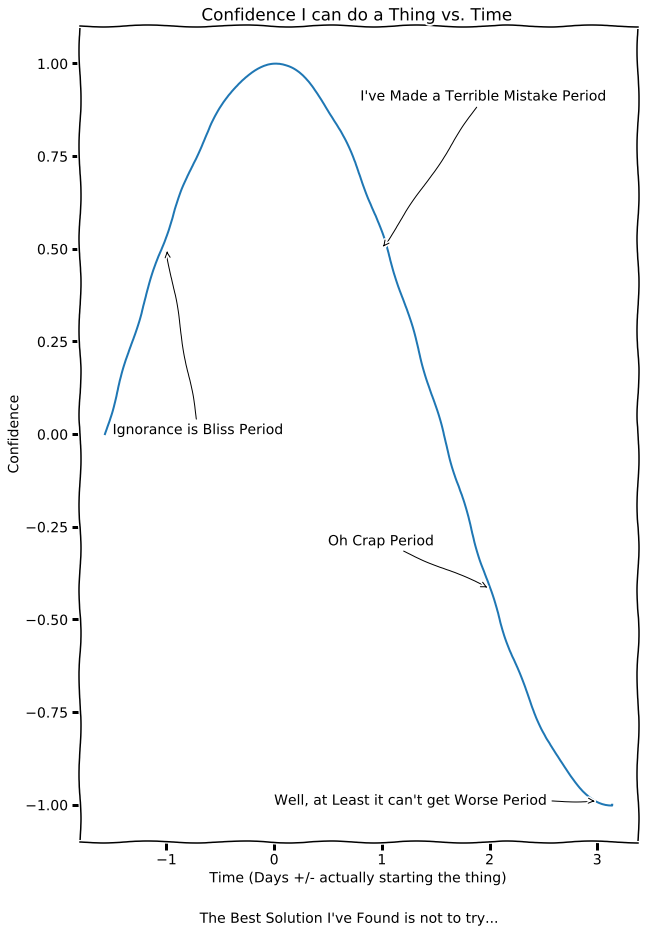

In [6]:
# An homage to one of the favorite web comics. Couldn't figure out how to make the hover caption :(

with plt.xkcd():
    x = numpy.arange(-numpy.pi / 2, numpy.pi, 0.01)
    fig = plt.figure(figsize=(10, 15))
    plt.plot(x, numpy.cos(x))
    plt.title("Confidence I can do a Thing vs. Time ")
    plt.xlabel("Time (Days +/- actually starting the thing)")
    plt.ylabel("Confidence")
    plt.annotate(
        'Ignorance is Bliss Period',
        xy=(-1, 0.5), arrowprops=dict(arrowstyle='->'), xytext=(-1.5, 0))
    plt.annotate(
        'I\'ve Made a Terrible Mistake Period',
        xy=(1, 0.5), arrowprops=dict(arrowstyle='->'), xytext=(0.8, 0.9))
    plt.annotate(
        'Oh Crap Period',
        xy=(2, -0.416), arrowprops=dict(arrowstyle='->'), xytext=(0.5, -0.3))
    plt.annotate(
        'Well, at Least it can\'t get Worse Period',
        xy=(3, -0.99), arrowprops=dict(arrowstyle='->'), xytext=(0, -1))

    fig.text(
        0.5, 0.05,
        'The Best Solution I\'ve Found is not to try...',
        ha='center')
